In [2]:
import onetick.query as otq
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.width', 200)

{'Time': array(['2006-06-01T14:30:01.344000', '2006-06-01T14:30:01.544000',
       '2006-06-01T14:30:06.828000', ..., '2006-06-01T20:59:58.880000',
       '2006-06-01T20:59:59.388000', '2006-06-01T20:59:59.887000'],
      dtype='datetime64[us]'), 'PRICE': array([22.75, 22.75, 22.74, ..., 22.83, 22.83, 22.84]), 'AVERAGE.VALUE': array([22.740625  , 22.74157895, 22.74839754, ..., 22.77271421,
       22.77284051, 22.77298135]), 'STDDEV.VALUE': array([0.00242061, 0.00364642, 0.00298524, ..., 0.01950818, 0.01966044,
       0.01981906]), 'LBAND': array([22.73578377, 22.7342861 , 22.74242707, ..., 22.73369784,
       22.73351962, 22.73334323]), 'UBAND': array([22.74546623, 22.74887179, 22.75436801, ..., 22.81173058,
       22.81216139, 22.81261947]), 'SIGNAL': array(['SELL', 'SELL', 'BUY', ..., 'SELL', 'SELL', 'SELL'], dtype='<U64')}
None
WHERE_CLAUSE
{'Time': array(['2006-06-01T14:30:01.344000', '2006-06-01T14:30:01.544000',
       '2006-06-01T14:30:06.828000', ..., '2006-06-01T20:59:58.88000

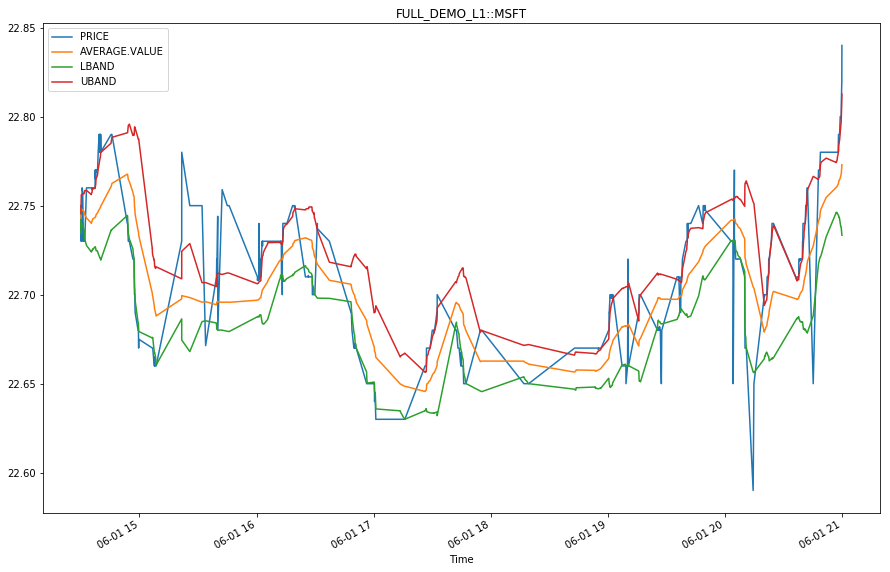

,PRICE,AVERAGE.VALUE,STDDEV.VALUE,LBAND,UBAND,SIGNAL
Time,,,,,,
2006-06-01 14:30:01.344,22.75,22.740625,0.002421,22.735784,22.745466,SELL
2006-06-01 14:30:01.544,22.75,22.741579,0.003646,22.734286,22.748872,SELL
2006-06-01 14:30:06.828,22.74,22.748398,0.002985,22.742427,22.754368,BUY
2006-06-01 14:30:08.986,22.74,22.748369,0.003002,22.742366,22.754372,BUY
2006-06-01 14:30:09.650,22.74,22.748304,0.003095,22.742114,22.754495,BUY


In [3]:
# output results as a dict
results = otq.run('otq/Q1_Basics_Bollinger.otq::Bollinger')
print(results.output('FULL_DEMO_L1::MSFT').data)
print(results.output('FULL_DEMO_L1::MSFT').error)
print(results.output('FULL_DEMO_L1::MSFT').tag)

print(results['FULL_DEMO_L1::MSFT'])
df = pd.DataFrame(results['FULL_DEMO_L1::MSFT'])
df.set_index(['Time'],inplace=True)
df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(title='FULL_DEMO_L1::MSFT',figsize=(15,10))
plt.show()
df.head()

[('FULL_DEMO_L1::MSFT', [('Time', array(['2006-06-01T14:30:01.344000', '2006-06-01T14:30:01.544000',
       '2006-06-01T14:30:06.828000', ..., '2006-06-01T20:59:58.880000',
       '2006-06-01T20:59:59.388000', '2006-06-01T20:59:59.887000'],
      dtype='datetime64[us]')), ('PRICE', array([22.75, 22.75, 22.74, ..., 22.83, 22.83, 22.84])), ('AVERAGE.VALUE', array([22.740625  , 22.74157895, 22.74839754, ..., 22.77271421,
       22.77284051, 22.77298135])), ('STDDEV.VALUE', array([0.00242061, 0.00364642, 0.00298524, ..., 0.01950818, 0.01966044,
       0.01981906])), ('LBAND', array([22.73578377, 22.7342861 , 22.74242707, ..., 22.73369784,
       22.73351962, 22.73334323])), ('UBAND', array([22.74546623, 22.74887179, 22.75436801, ..., 22.81173058,
       22.81216139, 22.81261947])), ('SIGNAL', array(['SELL', 'SELL', 'BUY', ..., 'SELL', 'SELL', 'SELL'], dtype='<U64'))], [], 'WHERE_CLAUSE')]


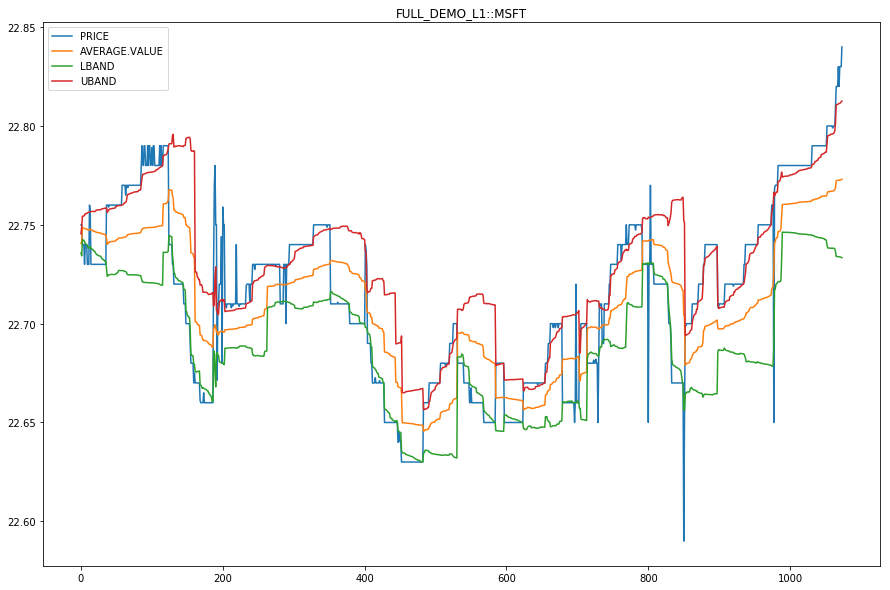

,Time,PRICE,AVERAGE.VALUE,STDDEV.VALUE,LBAND,UBAND,SIGNAL
0,2006-06-01 14:30:01.344,22.75,22.740625,0.002421,22.735784,22.745466,SELL
1,2006-06-01 14:30:01.544,22.75,22.741579,0.003646,22.734286,22.748872,SELL
2,2006-06-01 14:30:06.828,22.74,22.748398,0.002985,22.742427,22.754368,BUY
3,2006-06-01 14:30:08.986,22.74,22.748369,0.003002,22.742366,22.754372,BUY
4,2006-06-01 14:30:09.650,22.74,22.748304,0.003095,22.742114,22.754495,BUY


In [4]:
# Run otq file 'as-is'
from collections import OrderedDict

results = otq.run('otq/Q1_Basics_Bollinger.otq::Bollinger',output_structure='symbol_result_list')
print(results)
df = pd.DataFrame(OrderedDict(results[0][1]))
df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(title='FULL_DEMO_L1::MSFT',figsize=(15,10))
plt.show()
df.head()    

In [ ]:
# override symbols
symbols='FULL_DEMO_L1::GS'

results = otq.run('otq/Q1_Basics_Bollinger.otq::Bollinger',symbols=symbols)
df = pd.DataFrame(results[symbols])
pd.set_option('display.width', 200)
df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(title=symbols,figsize=(15,10))
plt.show()
df.head()

In [ ]:
#multiple symbols
symbols=['FULL_DEMO_L1::GS','FULL_DEMO_L1::IBM','FULL_DEMO_L1::MSFT']

results = otq.run('otq/Q1_Basics_Bollinger.otq::Bollinger',symbols=symbols)
for s in symbols:
    print(s)
    df = pd.DataFrame(results[s])
    print(df.head())
    df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(title=s,figsize=(15,10))
    plt.show()

In [ ]:
#multiple intervals
sym='FULL_DEMO_L1::MSFT'
start=datetime(2005,1,3,9,30)
end=datetime(2005,1,3,16)

for interval in (300,600,900,1800):
    result = otq.run('otq/Q1_Basics_Bollinger.otq::Bollinger',query_params={'INTERVAL':interval},\
                         symbols=sym,start=start,end=end)
    df = pd.DataFrame(result[sym])
    print(df.head())
    df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(title='{}/interval={}s'.format(sym,str(interval)),figsize=(12,7))
    plt.show()

